# Measure

Addition to detail 15-25 as 15 seemed to be the ideal (might be, just dont want it to be on the edge fo the data).

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv("files/200107_patterned_data_norm.csv", index_col=0)

In [3]:
bic = pd.DataFrame(columns=['n', 'bic', 'run'])
ix = 0

n_components_range = range(10, 15)

In [4]:
for n_components in n_components_range:
    for i in range(3):
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", max_iter=200, n_init=1)
        fitted = gmm.fit(data)
        bicnum = gmm.bic(data)
        bic.loc[ix] = [n_components, bicnum, i]
        ix += 1

        print(n_components, i, "BIC:", bicnum)

10 0 BIC: 23586191.960737415
10 1 BIC: 23581833.006273612
10 2 BIC: 23590056.656560224
11 0 BIC: 23526326.587206036
11 1 BIC: 23505899.42961513
11 2 BIC: 23527683.63574697
12 0 BIC: 22738622.23177822
12 1 BIC: 22968438.3428135
12 2 BIC: 22513112.7547009
13 0 BIC: 22046997.78136275
13 1 BIC: 22042171.56214903
13 2 BIC: 22109130.96265957
14 0 BIC: 22031141.24785599
14 1 BIC: 22240661.855823092
14 2 BIC: 21843714.238785207


In [11]:
bic.to_csv('files/BIC_detail_10-14.csv')

## Analyse BIC

In [6]:
import husl
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})


colors = [(257, 71, 27)]
palette = sns.color_palette([husl.husl_to_hex(*x) for x in colors])

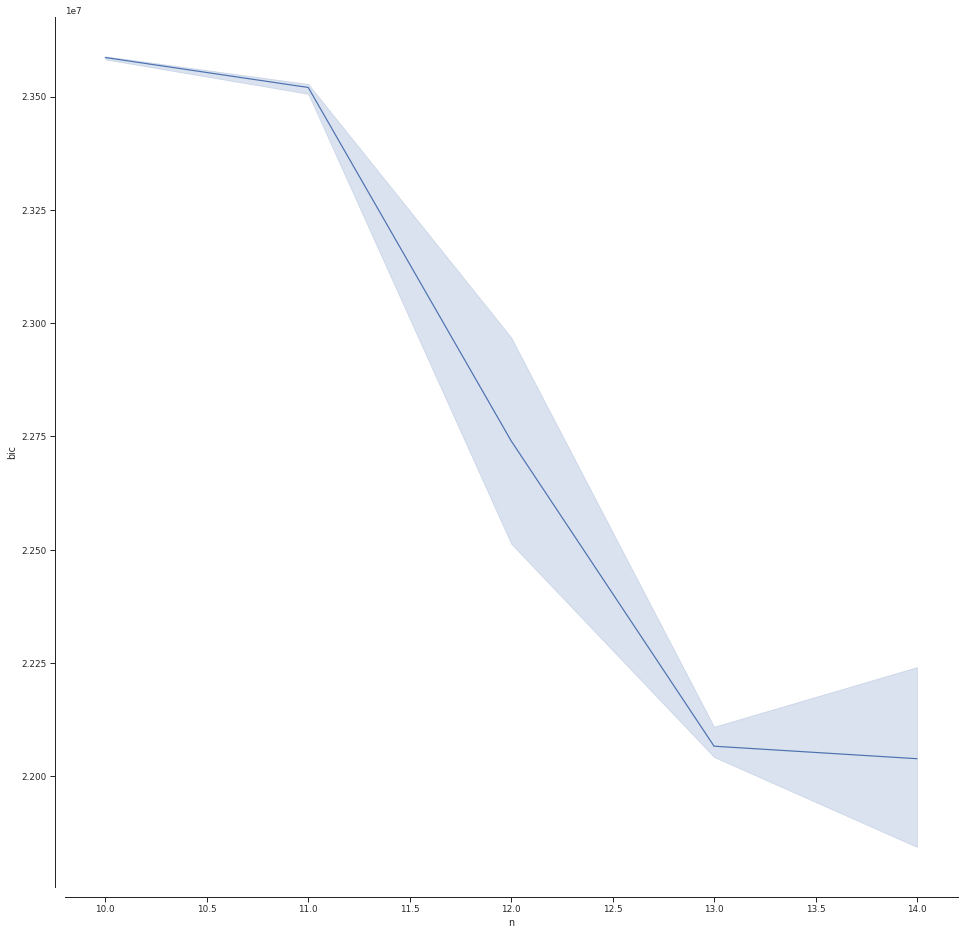

In [7]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="bic",
             data=bic, palette=palette)
sns.despine(offset=10)

## Analyse gradient

In [8]:
gradient = []
group = bic.groupby(['n']).mean()
group['gradient'] = np.gradient(group.bic)

group.reset_index(inplace=True)

In [9]:
group.to_csv('files/Gradient_detail_10-14.csv')

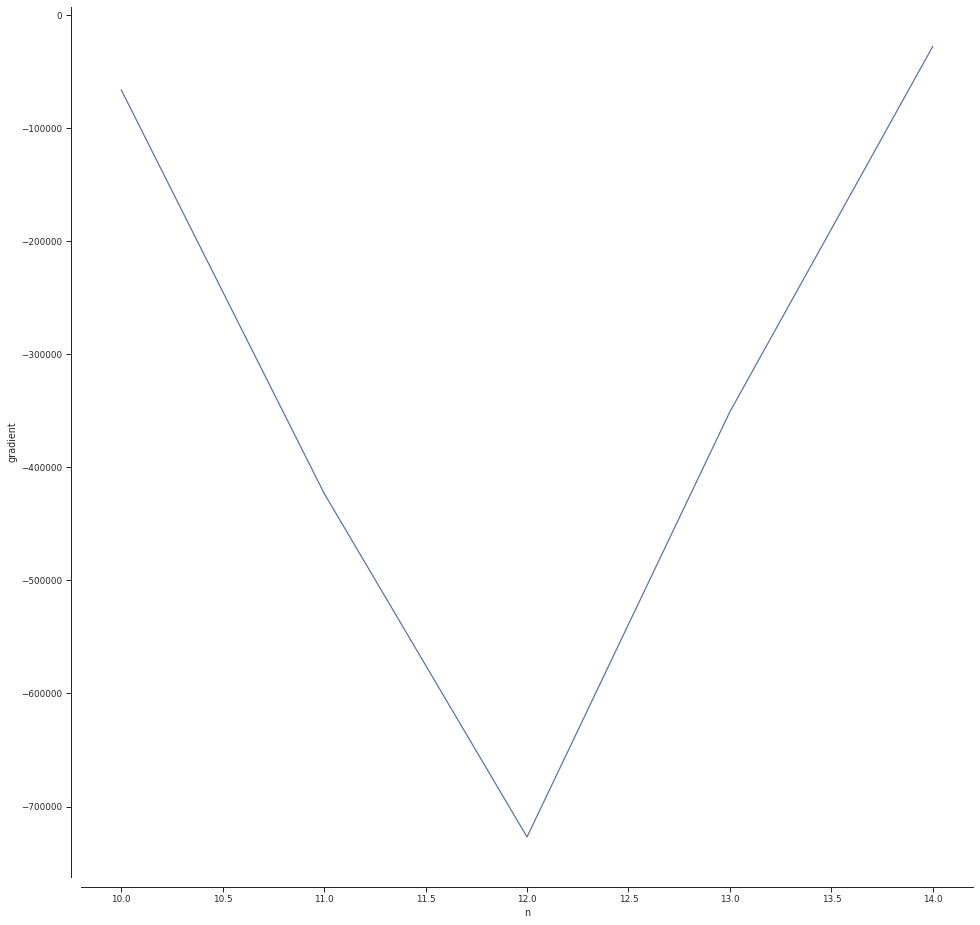

In [10]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x="n", y="gradient",
             data=group, palette=palette)
sns.despine(offset=10)